In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b59a0f248a67ea7f00c6fbe29a1eb479"
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Eagle River"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b59a0f248a67ea7f00c6fbe29a1eb479&q=Eagle River


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 79.7,
  'feels_like': 79.7,
  'temp_min': 73.85,
  'temp_max': 84.83,
  'pressure': 1022,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 155, 'gust': 11.01},
 'clouds': {'all': 75},
 'dt': 1622654400,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1622624978,
  'sunset': 1622679316},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
# Get the JSON data.
boston_data = city_weather.json()

In [11]:
boston_data['sys']["country"]

'US'

In [12]:
boston_data["dt"]

1622654400

In [13]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 84.83 37 75 4


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 6, 2, 17, 20)

In [15]:
# end 6.2.5

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-06-02 17:20:00'

In [16]:
# 6.2.6 using the imports from above start on getting list of cities in groups of 50

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kichmengskiy gorodok
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | beidao
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | khorixas
Processing Record 10 of Set 1 | torrington
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | imbituba
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | mount pleasant
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | hermanus
Processing Rec

Processing Record 38 of Set 4 | tripoli
Processing Record 39 of Set 4 | pacifica
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | pinar del rio
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | kroya
Processing Record 44 of Set 4 | lazarev
Processing Record 45 of Set 4 | havre-saint-pierre
Processing Record 46 of Set 4 | resistencia
Processing Record 47 of Set 4 | tygda
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | hilo
Processing Record 50 of Set 4 | sungai siput utara
City not found. Skipping...
Processing Record 1 of Set 5 | bad hersfeld
Processing Record 2 of Set 5 | smithers
Processing Record 3 of Set 5 | bereda
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | manpur
Processing Record 6 of Set 5 | parrita
Processing Record 7 of Set 5 | bonfim
Processing Record 8 of Set 5 | dikson
Processing Record 9 of Set 5 | thinadhoo
Processing Record 10 of Set 5 | i

Processing Record 25 of Set 8 | zhengjiatun
Processing Record 26 of Set 8 | mayor pablo lagerenza
Processing Record 27 of Set 8 | aripuana
Processing Record 28 of Set 8 | zeya
Processing Record 29 of Set 8 | oranjestad
Processing Record 30 of Set 8 | caravelas
Processing Record 31 of Set 8 | sochi
Processing Record 32 of Set 8 | san jose
Processing Record 33 of Set 8 | guarapari
Processing Record 34 of Set 8 | dingle
Processing Record 35 of Set 8 | lappeenranta
Processing Record 36 of Set 8 | hearst
Processing Record 37 of Set 8 | rocha
Processing Record 38 of Set 8 | sambava
Processing Record 39 of Set 8 | pericos
Processing Record 40 of Set 8 | ahuimanu
Processing Record 41 of Set 8 | diego de almagro
Processing Record 42 of Set 8 | iberia
Processing Record 43 of Set 8 | eatonton
Processing Record 44 of Set 8 | margate
Processing Record 45 of Set 8 | karoi
Processing Record 46 of Set 8 | kuhestan
City not found. Skipping...
Processing Record 47 of Set 8 | lahat
Processing Record 48 o

Processing Record 14 of Set 12 | soyo
Processing Record 15 of Set 12 | teruel
Processing Record 16 of Set 12 | bokspits
City not found. Skipping...
Processing Record 17 of Set 12 | araouane
Processing Record 18 of Set 12 | phonhong
Processing Record 19 of Set 12 | hastings
Processing Record 20 of Set 12 | aksha
Processing Record 21 of Set 12 | meyungs
City not found. Skipping...
Processing Record 22 of Set 12 | simiti
Processing Record 23 of Set 12 | leander
Processing Record 24 of Set 12 | valencia
Processing Record 25 of Set 12 | moerai
Processing Record 26 of Set 12 | port hedland
Processing Record 27 of Set 12 | yumen
Processing Record 28 of Set 12 | luoyang
Processing Record 29 of Set 12 | jalpa
Processing Record 30 of Set 12 | kholodnyy
Processing Record 31 of Set 12 | villamontes
Processing Record 32 of Set 12 | palestine
Processing Record 33 of Set 12 | waterloo
Processing Record 34 of Set 12 | yakeshi
Processing Record 35 of Set 12 | dunedin
Processing Record 36 of Set 12 | se

In [21]:
# 6.2.7 Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kichmengskiy Gorodok,59.9816,45.7854,47.19,63,98,5.23,RU,2021-06-02 18:42:58
1,Norman Wells,65.2820,-126.8329,46.44,71,75,9.22,CA,2021-06-02 18:40:41
2,Lavrentiya,65.5833,-171.0000,30.74,68,36,15.93,RU,2021-06-02 18:42:59
3,Ancud,-41.8697,-73.8203,48.00,100,90,13.80,CL,2021-06-02 18:39:59
4,Beidao,34.5686,105.8933,57.49,80,100,1.54,CN,2021-06-02 18:42:59
5,Bambous Virieux,-20.3428,57.7575,76.21,69,40,17.92,MU,2021-06-02 18:43:00
6,Qaanaaq,77.4840,-69.3632,27.97,77,98,3.22,GL,2021-06-02 18:43:00
7,Georgetown,5.4112,100.3354,82.89,87,20,3.00,MY,2021-06-02 18:39:01
8,Khorixas,-20.3667,14.9667,67.39,23,0,8.39,NA,2021-06-02 18:43:01
9,Torrington,41.8007,-73.1212,80.85,54,100,1.01,US,2021-06-02 18:43:01


In [23]:
# reorder the columns - you may use the SAME df name, you do NOT need to rename the dataframe, as shown below
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [24]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kichmengskiy Gorodok,RU,2021-06-02 18:42:58,59.9816,45.7854,47.19,63,98,5.23
1,Norman Wells,CA,2021-06-02 18:40:41,65.2820,-126.8329,46.44,71,75,9.22
2,Lavrentiya,RU,2021-06-02 18:42:59,65.5833,-171.0000,30.74,68,36,15.93
3,Ancud,CL,2021-06-02 18:39:59,-41.8697,-73.8203,48.00,100,90,13.80
4,Beidao,CN,2021-06-02 18:42:59,34.5686,105.8933,57.49,80,100,1.54
5,Bambous Virieux,MU,2021-06-02 18:43:00,-20.3428,57.7575,76.21,69,40,17.92
6,Qaanaaq,GL,2021-06-02 18:43:00,77.4840,-69.3632,27.97,77,98,3.22
7,Georgetown,MY,2021-06-02 18:39:01,5.4112,100.3354,82.89,87,20,3.00
8,Khorixas,NA,2021-06-02 18:43:01,-20.3667,14.9667,67.39,23,0,8.39
9,Torrington,US,2021-06-02 18:43:01,41.8007,-73.1212,80.85,54,100,1.01


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

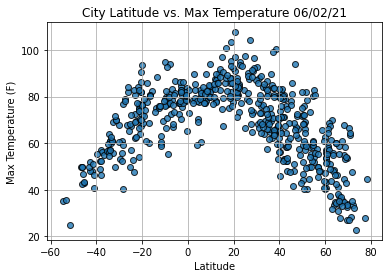

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

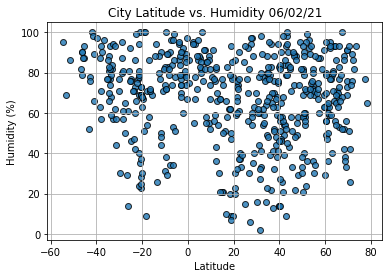

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

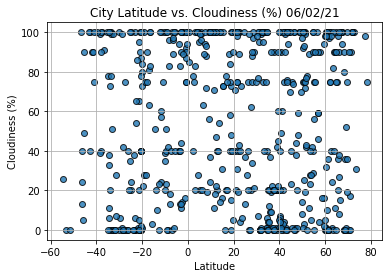

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

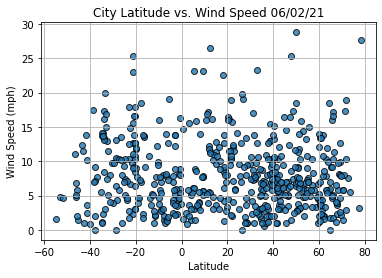

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()